In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
customer_df = pd.read_csv('data/Mall_Customers.csv')

# Mall Customer Segmentation

Perform EDA and find the hidden customer spending patterns in the dataset.

# Dataset Overview

In [3]:
customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EDA

## Customer Profile

In [4]:
fig = px.pie(
    data_frame=customer_df, 
    names='Gender', 
    title='Customer Genders', 
    hole=0.1, 
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.show()

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

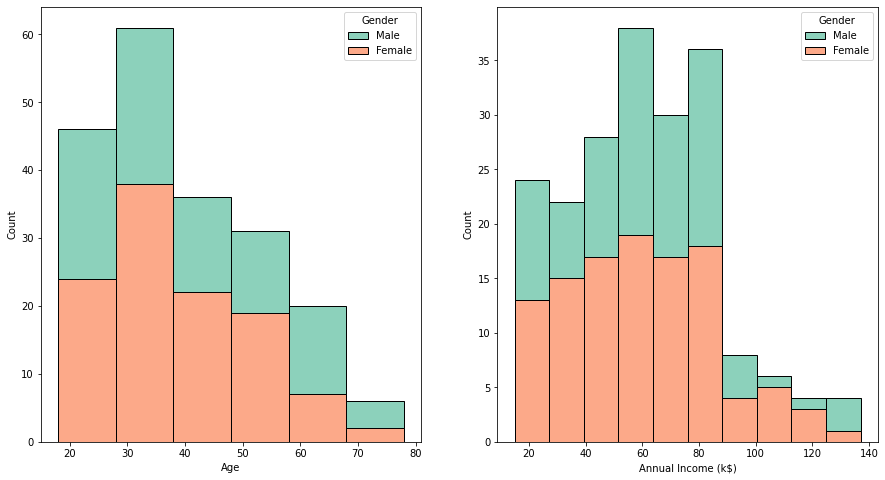

In [19]:
_, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 8))

sns.histplot(data=customer_df, x='Age', hue='Gender', binwidth=10, multiple='stack', palette='Set2', ax=ax0)
sns.histplot(data=customer_df, x='Annual Income (k$)', hue='Gender', multiple='stack', palette='Set2', ax=ax1)

In [6]:
customer_df['AgeGroup'] = pd.cut(customer_df['Age'], bins=5)
customer_df['IncomeGroup'] = pd.cut(customer_df['Annual Income (k$)'], bins=10)

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

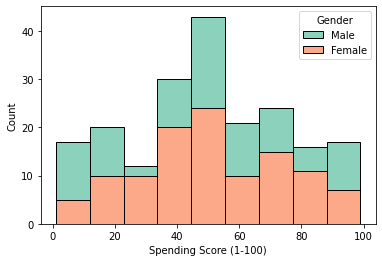

In [9]:
sns.histplot(data=customer_df, x='Spending Score (1-100)', hue='Gender', multiple='stack', palette='Set2')

In [10]:
def get_spending_group(spending_score):
    if spending_score <= 35:
        return 'low'
    if spending_score > 35 and spending_score <= 65:
        return 'medium'
    if spending_score > 65:
        return 'high'

customer_df['SpendingGroup'] = customer_df['Spending Score (1-100)'].apply(get_spending_group)

## Spending Score

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

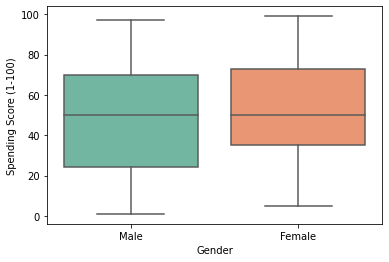

In [11]:
sns.boxplot(data=customer_df, x='Gender', y='Spending Score (1-100)', palette='Set2')

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

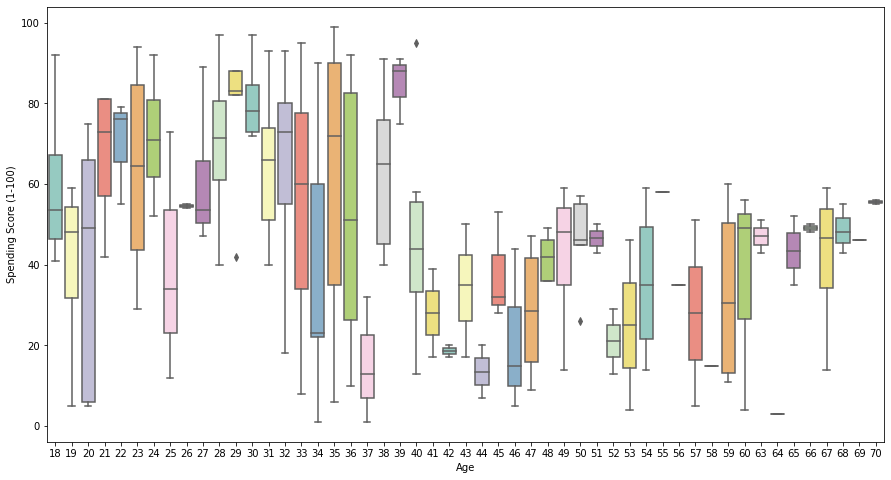

In [12]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=customer_df, x='Age', y='Spending Score (1-100)', palette='Set3')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

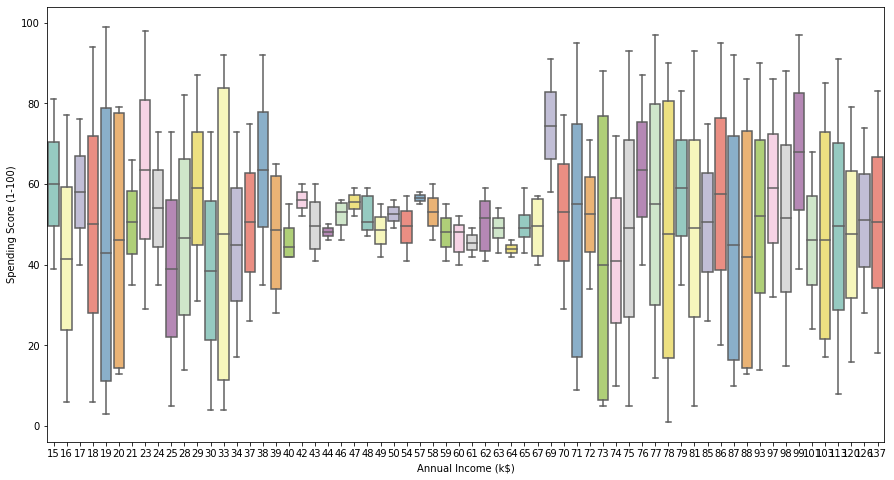

In [13]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=customer_df, x='Annual Income (k$)', y='Spending Score (1-100)', palette='Set3')

<AxesSubplot:xlabel='SpendingGroup', ylabel='Age'>

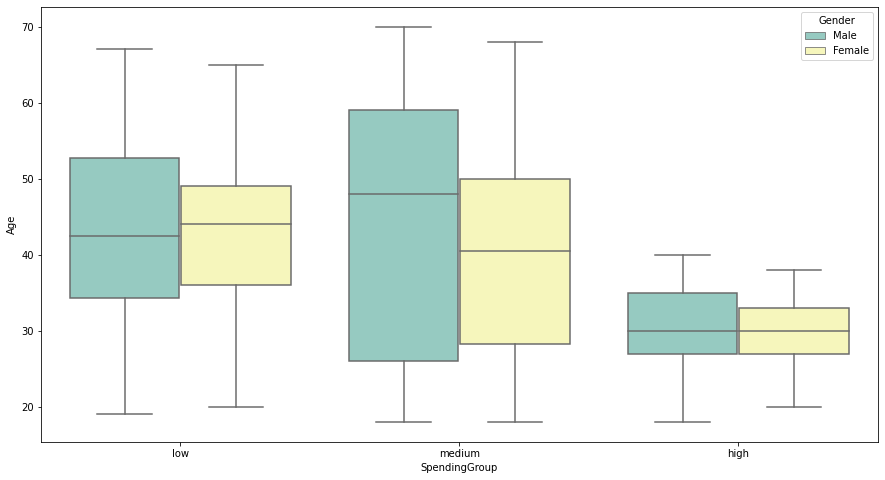

In [15]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=customer_df, x='SpendingGroup', y='Age', hue='Gender', order=['low', 'medium', 'high'], palette='Set3')

<AxesSubplot:xlabel='SpendingGroup', ylabel='Annual Income (k$)'>

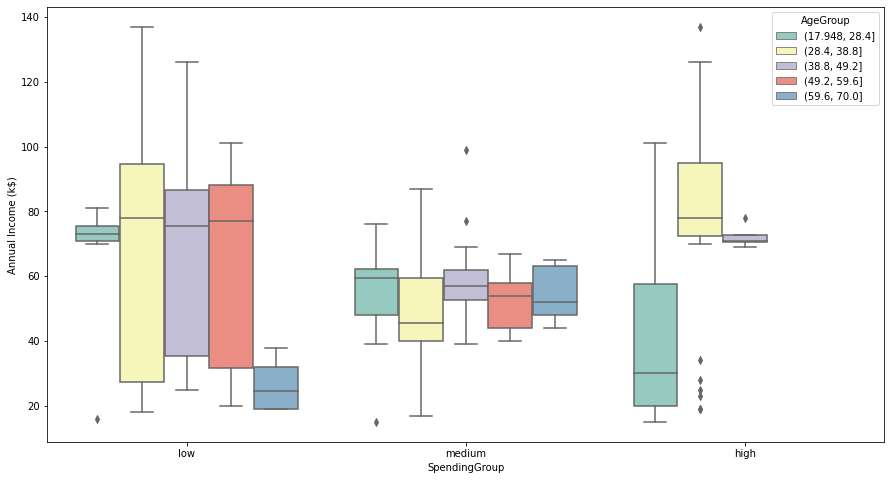

In [17]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=customer_df, x='SpendingGroup', y='Annual Income (k$)', hue='AgeGroup', order=['low', 'medium', 'high'], palette='Set3')

# Clustering

# Summary